In [1]:
from google.colab import drive
drive.mount("drive")

Mounted at drive


# Loading data

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
all_data = pd.read_csv("/content/drive/MyDrive/Crypto2022/data/extracted_data/all_ddos_data.csv")
all_data

,nTx,Weight,Size,nVin_Sum,nVin_Max,nVin_Avg,nVin_Stdv,nVout_Sum,nVout_Max,nVout_Min,...,Vout_value_Max_Avg.1,Vout_value_Min_Avg.1,Vout_value_Avg_Avg.1,Vout_value_Stdv_Avg.1,Vout_value_Sum_Stdv.1,Vout_value_Max_Stdv.1,Vout_value_Min_Stdv.1,Vout_value_Avg_Stdv.1,Vout_value_Stdv_Stdv.1,Is DDoS Attack ?
0,263.0,522324.0,130581.0,630.0,46.0,2.395437,4.301770,574.0,32.0,1.0,...,19.859117,1.116233,10.469447,9.362754,107.058714,106.626242,10.603761,54.217235,52.930936,1.0
1,520.0,810072.0,202518.0,962.0,39.0,1.850000,2.545093,1100.0,20.0,1.0,...,4.471181,0.546634,2.482065,1.952130,27.707261,25.106159,3.961290,13.905032,11.368915,1.0
2,1024.0,1843988.0,460997.0,2259.0,151.0,2.206055,6.441104,2153.0,64.0,1.0,...,18.096809,0.921873,9.248560,8.417921,92.757748,89.411144,4.470257,44.551254,43.914407,1.0
3,91.0,292416.0,73104.0,404.0,46.0,4.439560,7.476276,281.0,41.0,1.0,...,7.775807,2.133413,4.753616,2.702734,25.457229,24.144463,12.093965,16.121727,10.208519,1.0
4,676.0,996584.0,249146.0,1195.0,27.0,1.767751,1.985352,1361.0,8.0,1.0,...,20.156704,0.946217,10.246610,9.433812,120.007297,112.708442,6.135034,55.476641,54.739285,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152935,144.0,271480.0,67870.0,344.0,59.0,2.388889,5.294272,290.0,6.0,1.0,...,10.042027,0.705118,5.372587,4.667398,74.030660,73.156415,2.822569,37.048927,36.156742,0.0
152936,39.0,54444.0,13611.0,67.0,6.0,1.717949,1.239287,74.0,3.0,1.0,...,24.934455,10.409539,17.672176,7.262114,165.637878,110.755876,55.288298,82.802112,28.383778,0.0
152937,168.0,428732.0,107183.0,545.0,219.0,3.244048,16.908893,348.0,8.0,1.0,...,12.528032,3.304067,7.900074,4.587231,108.483768,81.647269,27.174261,54.256912,27.545603,0.0
152938,204.0,364116.0,91029.0,445.0,14.0,2.181373,2.100758,410.0,6.0,1.0,...,13.521109,8.002480,10.707613,2.737336,100.916248,100.494018,97.808888,98.448399,11.846447,0.0


# Train-Test split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = all_data.iloc[:, :-1].values
X.shape

(152940, 71)

In [6]:
y = all_data.iloc[:, -1].values
y.shape

(152940,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, shuffle=True)

In [8]:
print(X_train.shape)
print(y_train.shape)

(122352, 71)
(122352,)


In [9]:
print(X_test.shape)
print(y_test.shape)

(30588, 71)
(30588,)


# Training

In [10]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.5 MB/s eta 0:00:00


In [11]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, make_scorer, fbeta_score, classification_report, confusion_matrix

## PCA

### PCA 2 components

In [11]:
pca_2 = PCA(n_components=2, random_state=2023)
pca_2.fit(X_train)
X_pca_2 = pca_2.transform(X_train)

In [12]:
np.cumsum(pca_2.explained_variance_ratio_ * 100)

array([98.32432733, 99.54064612])

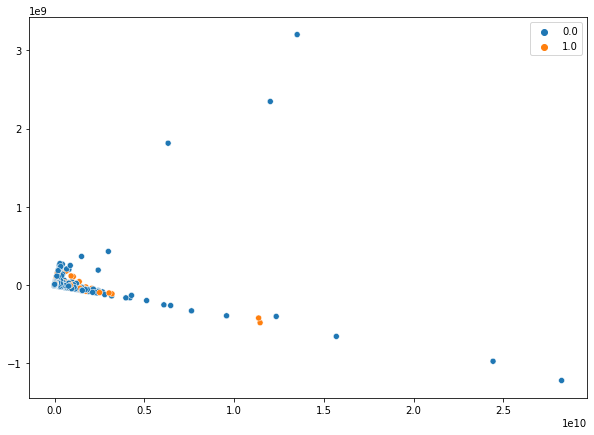

In [13]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], hue=y_train)
plt.show()

### PCA 3 components

In [14]:
pca_3 = PCA(n_components=3, random_state=42)
pca_3.fit(X_train)
X_pca_3 = pca_3.transform(X_train)

In [15]:
np.cumsum(pca_3.explained_variance_ratio_ * 100)

array([98.32432733, 99.54064612, 99.992245  ])

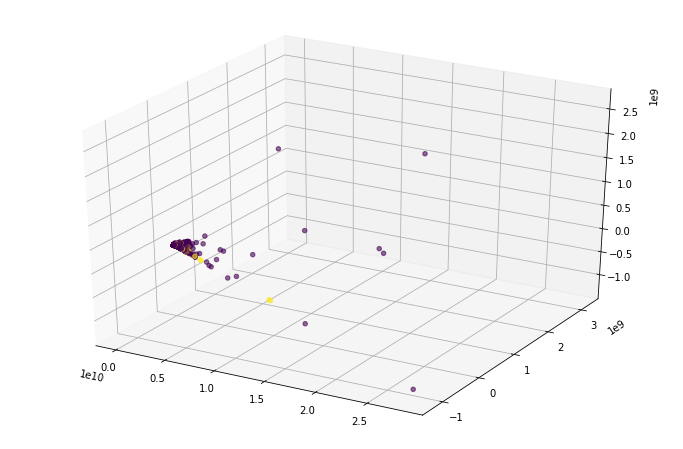

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2],
                      c = y_train, alpha=0.6)
plt.show()

### Keep 99% variability

In [12]:
pca_99 = PCA(n_components=0.99, random_state=42)
pca_99.fit(X_train)
X_train_pca_99 = pca_99.transform(X_train)
X_test_pca_99 = pca_99.transform(X_test)

In [46]:
X_train_pca_99.shape

(122352, 2)

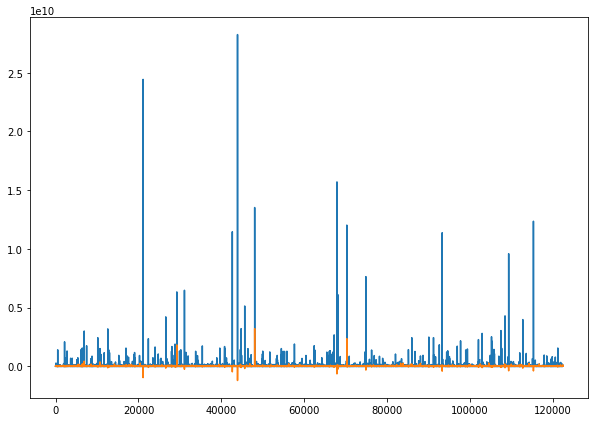

In [29]:
plt.figure(figsize=(10, 7))
plt.plot(X_train_pca_99)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

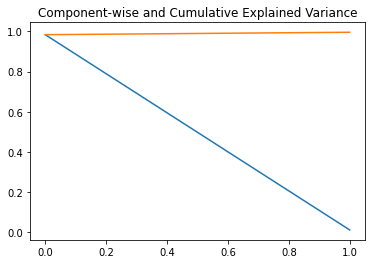

In [30]:
plt.plot(range(X_train_pca_99.shape[1]), pca_99.explained_variance_ratio_)
plt.plot(range(X_train_pca_99.shape[1]), np.cumsum(pca_99.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

Through PCA, we keep 99% variability of data with just 2 features

## Dealing with unbalanced data

In [13]:
# balancing 'target' class weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [14]:
sampler = SMOTE()

In [15]:
X_train_resample, y_train_resample = sampler.fit_resample(X_train, y_train)

In [16]:
X_train_resample.shape

(217618, 71)

In [17]:
sum(y_train_resample == 0) / sum(y_train_resample == 1)

1.0

## Standardization & Normalization

In [18]:
standarder = StandardScaler()
normalizer = MinMaxScaler()

## Metric

In [19]:
f_onehalf_scorer = make_scorer(fbeta_score, beta=0.5)

## CatBoost

### Baseline

In [58]:
classifier = CatBoostClassifier(eval_metric="TotalF1", task_type="GPU", learning_rate=0.1)
classifier.fit(X_train, y_train,
                eval_set=[(X_test, y_test)], 
                early_stopping_rounds=20)

0:	learn: 0.8376887	test: 0.8342047	best: 0.8342047 (0)	total: 12.6ms	remaining: 12.6s
1:	learn: 0.8375191	test: 0.8341742	best: 0.8342047 (0)	total: 26ms	remaining: 13s
2:	learn: 0.8378880	test: 0.8344896	best: 0.8344896 (2)	total: 38.1ms	remaining: 12.7s
3:	learn: 0.8379641	test: 0.8345390	best: 0.8345390 (3)	total: 50ms	remaining: 12.5s
4:	learn: 0.8374604	test: 0.8342070	best: 0.8345390 (3)	total: 64.4ms	remaining: 12.8s
5:	learn: 0.8372691	test: 0.8339841	best: 0.8345390 (3)	total: 76.5ms	remaining: 12.7s
6:	learn: 0.8376988	test: 0.8343334	best: 0.8345390 (3)	total: 87.9ms	remaining: 12.5s
7:	learn: 0.8381782	test: 0.8349816	best: 0.8349816 (7)	total: 103ms	remaining: 12.8s
8:	learn: 0.8382483	test: 0.8349355	best: 0.8349816 (7)	total: 115ms	remaining: 12.7s
9:	learn: 0.8389615	test: 0.8350858	best: 0.8350858 (9)	total: 131ms	remaining: 13s
10:	learn: 0.8384587	test: 0.8352189	best: 0.8352189 (10)	total: 145ms	remaining: 13s
11:	learn: 0.8380674	test: 0.8348398	best: 0.8352189 (1

In [59]:
y_train_pred = classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.8957270825160194
Training F0.5: 0.27669148765200624
[[108561    248]
 [ 12510   1033]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.94    108809
         1.0       0.81      0.08      0.14     13543

    accuracy                           0.90    122352
   macro avg       0.85      0.54      0.54    122352
weighted avg       0.89      0.90      0.86    122352



In [60]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.8898914607035439
Testing F0.5: 0.19806338028169013
[[27040    92]
 [ 3276   180]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     27132
         1.0       0.66      0.05      0.10      3456

    accuracy                           0.89     30588
   macro avg       0.78      0.52      0.52     30588
weighted avg       0.87      0.89      0.85     30588



### Balanced weight

In [64]:
classifier = CatBoostClassifier(eval_metric="TotalF1", task_type="GPU", auto_class_weights="Balanced", learning_rate=0.1)
classifier.fit(X_train, y_train,
                eval_set=[(X_test, y_test)],
                early_stopping_rounds=20)

0:	learn: 0.6458732	test: 0.6337312	best: 0.6337312 (0)	total: 13.1ms	remaining: 13.1s
1:	learn: 0.6573552	test: 0.6427867	best: 0.6427867 (1)	total: 25.8ms	remaining: 12.9s
2:	learn: 0.6565665	test: 0.6418412	best: 0.6427867 (1)	total: 37.8ms	remaining: 12.6s
3:	learn: 0.6657701	test: 0.6552298	best: 0.6552298 (3)	total: 49.7ms	remaining: 12.4s
4:	learn: 0.6688597	test: 0.6603738	best: 0.6603738 (4)	total: 61.9ms	remaining: 12.3s
5:	learn: 0.6705178	test: 0.6641547	best: 0.6641547 (5)	total: 74ms	remaining: 12.3s
6:	learn: 0.6696366	test: 0.6619702	best: 0.6641547 (5)	total: 87.5ms	remaining: 12.4s
7:	learn: 0.6718762	test: 0.6676584	best: 0.6676584 (7)	total: 99.7ms	remaining: 12.4s
8:	learn: 0.6704038	test: 0.6664398	best: 0.6676584 (7)	total: 111ms	remaining: 12.3s
9:	learn: 0.6710099	test: 0.6673429	best: 0.6676584 (7)	total: 124ms	remaining: 12.3s
10:	learn: 0.6722358	test: 0.6674576	best: 0.6676584 (7)	total: 137ms	remaining: 12.3s
11:	learn: 0.6716108	test: 0.6661015	best: 0.66

In [65]:
y_train_pred = classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.7167925330194848
Training F0.5: 0.2810311027226819
[[77695 31114]
 [ 3537 10006]]
              precision    recall  f1-score   support

         0.0       0.96      0.71      0.82    108809
         1.0       0.24      0.74      0.37     13543

    accuracy                           0.72    122352
   macro avg       0.60      0.73      0.59    122352
weighted avg       0.88      0.72      0.77    122352



In [66]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.7040342618020139
Testing F0.5: 0.2652561247216036
[[19153  7979]
 [ 1074  2382]]
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     27132
         1.0       0.23      0.69      0.34      3456

    accuracy                           0.70     30588
   macro avg       0.59      0.70      0.58     30588
weighted avg       0.87      0.70      0.76     30588



### Using SMOTE

In [68]:
classifier = CatBoostClassifier(eval_metric="TotalF1", task_type="GPU", auto_class_weights="Balanced", learning_rate=0.1)
classifier.fit(X_train_resample, y_train_resample,
                eval_set=[(X_test, y_test)],
                early_stopping_rounds=20)

0:	learn: 0.7184180	test: 0.7819509	best: 0.7819509 (0)	total: 14.3ms	remaining: 14.3s
1:	learn: 0.7270208	test: 0.7900749	best: 0.7900749 (1)	total: 28.2ms	remaining: 14.1s
2:	learn: 0.7359978	test: 0.7867917	best: 0.7900749 (1)	total: 42ms	remaining: 13.9s
3:	learn: 0.7469236	test: 0.7932419	best: 0.7932419 (3)	total: 55.4ms	remaining: 13.8s
4:	learn: 0.7491150	test: 0.7840419	best: 0.7932419 (3)	total: 68.6ms	remaining: 13.7s
5:	learn: 0.7680049	test: 0.7823614	best: 0.7932419 (3)	total: 82.2ms	remaining: 13.6s
6:	learn: 0.7715062	test: 0.7889743	best: 0.7932419 (3)	total: 96ms	remaining: 13.6s
7:	learn: 0.7714469	test: 0.7914212	best: 0.7932419 (3)	total: 109ms	remaining: 13.6s
8:	learn: 0.7736383	test: 0.7890743	best: 0.7932419 (3)	total: 122ms	remaining: 13.5s
9:	learn: 0.7764275	test: 0.7911284	best: 0.7932419 (3)	total: 136ms	remaining: 13.5s
10:	learn: 0.7788994	test: 0.7934132	best: 0.7934132 (10)	total: 149ms	remaining: 13.4s
11:	learn: 0.7839732	test: 0.7976898	best: 0.7976

In [69]:
y_train_pred = classifier.predict(X_train_resample)
print("Training Accuracy:", accuracy_score(y_train_resample, y_train_pred))
print("Training F0.5:", fbeta_score(y_train_resample, y_train_pred, beta=0.5))
print(confusion_matrix(y_train_resample, y_train_pred))
print(classification_report(y_train_resample, y_train_pred))

Training Accuracy: 0.9028664908233693
Training F0.5: 0.917308789264548
[[101600   7209]
 [ 13929  94880]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91    108809
         1.0       0.93      0.87      0.90    108809

    accuracy                           0.90    217618
   macro avg       0.90      0.90      0.90    217618
weighted avg       0.90      0.90      0.90    217618



In [70]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.8578527527134824
Testing F0.5: 0.31532167042889386
[[25346  1786]
 [ 2562   894]]
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     27132
         1.0       0.33      0.26      0.29      3456

    accuracy                           0.86     30588
   macro avg       0.62      0.60      0.61     30588
weighted avg       0.84      0.86      0.85     30588



### Using PCA

In [71]:
classifier = CatBoostClassifier(eval_metric="TotalF1", task_type="GPU", auto_class_weights="Balanced", learning_rate=0.1)
classifier.fit(X_train_pca_99, y_train,
                eval_set=[(X_test_pca_99, y_test)],
                early_stopping_rounds=20)

0:	learn: 0.6258010	test: 0.6246575	best: 0.6246575 (0)	total: 10.1ms	remaining: 10.1s
1:	learn: 0.6258449	test: 0.6246021	best: 0.6246575 (0)	total: 19.3ms	remaining: 9.65s
2:	learn: 0.6258316	test: 0.6246206	best: 0.6246575 (0)	total: 28.6ms	remaining: 9.51s
3:	learn: 0.6258409	test: 0.6246391	best: 0.6246575 (0)	total: 37.8ms	remaining: 9.41s
4:	learn: 0.6258456	test: 0.6246391	best: 0.6246575 (0)	total: 47.3ms	remaining: 9.41s
5:	learn: 0.6258257	test: 0.6248169	best: 0.6248169 (5)	total: 56.5ms	remaining: 9.36s
6:	learn: 0.6260419	test: 0.6249194	best: 0.6249194 (6)	total: 66.1ms	remaining: 9.37s
7:	learn: 0.6260466	test: 0.6249194	best: 0.6249194 (6)	total: 75.4ms	remaining: 9.34s
8:	learn: 0.6260015	test: 0.6266165	best: 0.6266165 (8)	total: 84.7ms	remaining: 9.32s
9:	learn: 0.6262567	test: 0.6243769	best: 0.6266165 (8)	total: 93.9ms	remaining: 9.3s
10:	learn: 0.6260698	test: 0.6249379	best: 0.6266165 (8)	total: 105ms	remaining: 9.46s
11:	learn: 0.6260286	test: 0.6249564	best: 0

In [72]:
y_train_pred = classifier.predict(X_train_pca_99)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.5909343533411795
Training F0.5: 0.1992084601689814
[[62970 45839]
 [ 4211  9332]]
              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72    108809
         1.0       0.17      0.69      0.27     13543

    accuracy                           0.59    122352
   macro avg       0.55      0.63      0.49    122352
weighted avg       0.85      0.59      0.67    122352



In [73]:
y_test_pred = classifier.predict(X_test_pca_99)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.5858833529488688
Testing F0.5: 0.2013958964009418
[[15526 11606]
 [ 1061  2395]]
              precision    recall  f1-score   support

         0.0       0.94      0.57      0.71     27132
         1.0       0.17      0.69      0.27      3456

    accuracy                           0.59     30588
   macro avg       0.55      0.63      0.49     30588
weighted avg       0.85      0.59      0.66     30588



## XGBoost

### Baseline

In [62]:
classifier = XGBClassifier(method="gpu_hist")
classifier.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)], 
                early_stopping_rounds=20)

[0]	validation_0-error:0.110689	validation_1-error:0.112985
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.110689	validation_1-error:0.112985
[2]	validation_0-error:0.110689	validation_1-error:0.112985
[3]	validation_0-error:0.110689	validation_1-error:0.112985
[4]	validation_0-error:0.110689	validation_1-error:0.112985
[5]	validation_0-error:0.110689	validation_1-error:0.112985
[6]	validation_0-error:0.110689	validation_1-error:0.112985
[7]	validation_0-error:0.110689	validation_1-error:0.112985
[8]	validation_0-error:0.110689	validation_1-error:0.112985
[9]	validation_0-error:0.110689	validation_1-error:0.112985
[10]	validation_0-error:0.110689	validation_1-error:0.112985
[11]	validation_0-error:0.110689	validation_1-error:0.112985
[12]	validation_0-error:0.110689	validation_1-error:0.112985
[13]	validation_0-error:0.110689	validation_1-error:0.11

XGBClassifier(method='gpu_hist')

In [63]:
y_train_pred = classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.8893111677782137
Training F0.5: 0.0
[[108809      0]
 [ 13543      0]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94    108809
         1.0       0.00      0.00      0.00     13543

    accuracy                           0.89    122352
   macro avg       0.44      0.50      0.47    122352
weighted avg       0.79      0.89      0.84    122352



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.8870145154962731
Testing F0.5: 0.0
[[27132     0]
 [ 3456     0]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     27132
         1.0       0.00      0.00      0.00      3456

    accuracy                           0.89     30588
   macro avg       0.44      0.50      0.47     30588
weighted avg       0.79      0.89      0.83     30588



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Balaned weight

In [24]:
classifier = XGBClassifier(method="gpu_hist")
classifier.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                sample_weight=sample_weights, 
                early_stopping_rounds=20)

[0]	validation_0-error:0.268569	validation_1-error:0.273146
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.391739	validation_1-error:0.396168
[2]	validation_0-error:0.377468	validation_1-error:0.383255
[3]	validation_0-error:0.367914	validation_1-error:0.373414
[4]	validation_0-error:0.35755	validation_1-error:0.361547
[5]	validation_0-error:0.369099	validation_1-error:0.374232
[6]	validation_0-error:0.335793	validation_1-error:0.341506
[7]	validation_0-error:0.358155	validation_1-error:0.361089
[8]	validation_0-error:0.359144	validation_1-error:0.361776
[9]	validation_0-error:0.352205	validation_1-error:0.355041
[10]	validation_0-error:0.33697	validation_1-error:0.340231
[11]	validation_0-error:0.332034	validation_1-error:0.336112
[12]	validation_0-error:0.341359	validation_1-error:0.345168
[13]	validation_0-error:0.340158	validation_1-error:0.3443

XGBClassifier(method='gpu_hist')

In [25]:
y_train_pred = classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.7314306263894338
Training F0.5: 0.2360704716612646
[[82602 26207]
 [ 6653  6890]]
              precision    recall  f1-score   support

         0.0       0.93      0.76      0.83    108809
         1.0       0.21      0.51      0.30     13543

    accuracy                           0.73    122352
   macro avg       0.57      0.63      0.56    122352
weighted avg       0.85      0.73      0.77    122352



In [26]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.7268536681051393
Testing F0.5: 0.23242506811989097
[[20527  6605]
 [ 1750  1706]]
              precision    recall  f1-score   support

         0.0       0.92      0.76      0.83     27132
         1.0       0.21      0.49      0.29      3456

    accuracy                           0.73     30588
   macro avg       0.56      0.63      0.56     30588
weighted avg       0.84      0.73      0.77     30588



### Using SMOTE

In [60]:
classifier = XGBClassifier(method="gpu_hist")
classifier.fit(X_train_resample, y_train_resample,
                eval_set=[(X_train_resample, y_train_resample), (X_test, y_test)],
                early_stopping_rounds=20)

[0]	validation_0-error:0.303049	validation_1-error:0.412253
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.302094	validation_1-error:0.413561
[2]	validation_0-error:0.285597	validation_1-error:0.294135
[3]	validation_0-error:0.283851	validation_1-error:0.29541
[4]	validation_0-error:0.28618	validation_1-error:0.294625
[5]	validation_0-error:0.276507	validation_1-error:0.318981
[6]	validation_0-error:0.277629	validation_1-error:0.291454
[7]	validation_0-error:0.264679	validation_1-error:0.291846
[8]	validation_0-error:0.25996	validation_1-error:0.289329
[9]	validation_0-error:0.256854	validation_1-error:0.287891
[10]	validation_0-error:0.261164	validation_1-error:0.29577
[11]	validation_0-error:0.257042	validation_1-error:0.288348
[12]	validation_0-error:0.25627	validation_1-error:0.275827
[13]	validation_0-error:0.250388	validation_1-error:0.273866


XGBClassifier(method='gpu_hist')

In [64]:
y_train_pred = classifier.predict(X_train_resample)
print("Training Accuracy:", accuracy_score(y_train_resample, y_train_pred))
print("Training F0.5:", fbeta_score(y_train_resample, y_train_pred, beta=0.5))
print(confusion_matrix(y_train_resample, y_train_pred))
print(classification_report(y_train_resample, y_train_pred))

Training Accuracy: 0.8310341975388066
Training F0.5: 0.837171049518369
[[92391 16418]
 [20352 88457]]
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83    108809
         1.0       0.84      0.81      0.83    108809

    accuracy                           0.83    217618
   macro avg       0.83      0.83      0.83    217618
weighted avg       0.83      0.83      0.83    217618



In [65]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.7949849614227802
Testing F0.5: 0.26566651039224876
[[22957  4175]
 [ 2096  1360]]
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88     27132
         1.0       0.25      0.39      0.30      3456

    accuracy                           0.79     30588
   macro avg       0.58      0.62      0.59     30588
weighted avg       0.84      0.79      0.81     30588



### Using PCA

In [74]:
classifier = XGBClassifier(method="gpu_hist")
classifier.fit(X_train_pca_99, y_train,
                eval_set=[(X_train_pca_99, y_train), (X_test_pca_99, y_test)],
                sample_weight=sample_weights, 
                early_stopping_rounds=20)

[0]	validation_0-error:0.394632	validation_1-error:0.397542
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.394632	validation_1-error:0.397542
[2]	validation_0-error:0.394632	validation_1-error:0.397542
[3]	validation_0-error:0.393757	validation_1-error:0.396626
[4]	validation_0-error:0.386933	validation_1-error:0.390447
[5]	validation_0-error:0.386949	validation_1-error:0.39048
[6]	validation_0-error:0.393692	validation_1-error:0.396593
[7]	validation_0-error:0.393774	validation_1-error:0.396659
[8]	validation_0-error:0.392638	validation_1-error:0.395743
[9]	validation_0-error:0.387963	validation_1-error:0.391461
[10]	validation_0-error:0.388862	validation_1-error:0.392605
[11]	validation_0-error:0.391453	validation_1-error:0.395155
[12]	validation_0-error:0.390349	validation_1-error:0.394174
[13]	validation_0-error:0.402715	validation_1-error:0.406

XGBClassifier(method='gpu_hist')

In [75]:
y_train_pred = classifier.predict(X_train_pca_99)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.6130672159016608
Training F0.5: 0.1999789688327245
[[66262 42547]
 [ 4795  8748]]
              precision    recall  f1-score   support

         0.0       0.93      0.61      0.74    108809
         1.0       0.17      0.65      0.27     13543

    accuracy                           0.61    122352
   macro avg       0.55      0.63      0.50    122352
weighted avg       0.85      0.61      0.69    122352



In [76]:
y_test_pred = classifier.predict(X_test_pca_99)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.6095527657905061
Testing F0.5: 0.2020156329159731
[[16412 10720]
 [ 1223  2233]]
              precision    recall  f1-score   support

         0.0       0.93      0.60      0.73     27132
         1.0       0.17      0.65      0.27      3456

    accuracy                           0.61     30588
   macro avg       0.55      0.63      0.50     30588
weighted avg       0.84      0.61      0.68     30588



## Randomforest

### Baseline

In [37]:
classifier = RandomForestClassifier(n_jobs=10)
classifier.fit(X_train, y_train)

In [39]:
y_train_pred = classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.9998038446449589
Training F0.5: 0.9992465763543159
[[108800      9]
 [    15  13528]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    108809
         1.0       1.00      1.00      1.00     13543

    accuracy                           1.00    122352
   macro avg       1.00      1.00      1.00    122352
weighted avg       1.00      1.00      1.00    122352



In [40]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.8883222178632143
Testing F0.5: 0.13452380952380952
[[27059    73]
 [ 3343   113]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     27132
         1.0       0.61      0.03      0.06      3456

    accuracy                           0.89     30588
   macro avg       0.75      0.52      0.50     30588
weighted avg       0.86      0.89      0.84     30588



### Balanced weight

In [42]:
classifier = RandomForestClassifier(class_weight="balanced", n_jobs=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=10)

In [43]:
y_train_pred = classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.9997711520857853
Training F0.5: 0.9985690471624351
[[108786     23]
 [     5  13538]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    108809
         1.0       1.00      1.00      1.00     13543

    accuracy                           1.00    122352
   macro avg       1.00      1.00      1.00    122352
weighted avg       1.00      1.00      1.00    122352



In [44]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.8882241401856937
Testing F0.5: 0.12366634335596507
[[27067    65]
 [ 3354   102]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     27132
         1.0       0.61      0.03      0.06      3456

    accuracy                           0.89     30588
   macro avg       0.75      0.51      0.50     30588
weighted avg       0.86      0.89      0.84     30588



### Using SMOTE

In [35]:
classifier = RandomForestClassifier(n_estimators=100, n_jobs=10)
classifier.fit(X_train_resample, y_train_resample)

RandomForestClassifier(n_jobs=10)

In [36]:
y_train_pred = classifier.predict(X_train_resample)
print("Training Accuracy:", accuracy_score(y_train_resample, y_train_pred))
print("Training F0.5:", fbeta_score(y_train_resample, y_train_pred, beta=0.5))
print(confusion_matrix(y_train_resample, y_train_pred))
print(classification_report(y_train_resample, y_train_pred))

Training Accuracy: 0.9998943102133095
Training F0.5: 0.9998364358451765
[[108787     22]
 [     1 108808]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    108809
         1.0       1.00      1.00      1.00    108809

    accuracy                           1.00    217618
   macro avg       1.00      1.00      1.00    217618
weighted avg       1.00      1.00      1.00    217618



In [37]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.8355564273571335
Testing F0.5: 0.28119359205776173
[[24561  2571]
 [ 2459   997]]
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     27132
         1.0       0.28      0.29      0.28      3456

    accuracy                           0.84     30588
   macro avg       0.59      0.60      0.60     30588
weighted avg       0.84      0.84      0.84     30588



### Using PCA

In [45]:
classifier.fit(X_train_pca_99, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=10)

In [48]:
y_train_pred = classifier.predict(X_train_pca_99)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.994965345887276
Training F0.5: 0.9742046935160379
[[108427    382]
 [   234  13309]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    108809
         1.0       0.97      0.98      0.98     13543

    accuracy                           0.99    122352
   macro avg       0.98      0.99      0.99    122352
weighted avg       0.99      0.99      0.99    122352



In [49]:
y_test_pred = classifier.predict(X_test_pca_99)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.8557604289263764
Testing F0.5: 0.1234567901234568
[[25952  1180]
 [ 3232   224]]
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     27132
         1.0       0.16      0.06      0.09      3456

    accuracy                           0.86     30588
   macro avg       0.52      0.51      0.51     30588
weighted avg       0.81      0.86      0.83     30588



## Logistic Regression

### Baseline

In [29]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_train_pred = classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.8887390479926769
Training F0.5: 0.021312277269233456
[[108678    131]
 [ 13482     61]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94    108809
         1.0       0.32      0.00      0.01     13543

    accuracy                           0.89    122352
   macro avg       0.60      0.50      0.47    122352
weighted avg       0.83      0.89      0.84    122352



In [31]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.886458741990323
Testing F0.5: 0.01925192519251925
[[27101    31]
 [ 3442    14]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     27132
         1.0       0.31      0.00      0.01      3456

    accuracy                           0.89     30588
   macro avg       0.60      0.50      0.47     30588
weighted avg       0.82      0.89      0.83     30588



### Balanced weight

In [38]:
classifier = LogisticRegression(max_iter=1000, class_weight="balanced")
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [39]:
y_train_pred = classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.350055577350595
Training F0.5: 0.15318102296627023
[[31570 77239]
 [ 2283 11260]]
              precision    recall  f1-score   support

         0.0       0.93      0.29      0.44    108809
         1.0       0.13      0.83      0.22     13543

    accuracy                           0.35    122352
   macro avg       0.53      0.56      0.33    122352
weighted avg       0.84      0.35      0.42    122352



In [40]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.34909114685497583
Testing F0.5: 0.156844723183391
[[ 7777 19355]
 [  555  2901]]
              precision    recall  f1-score   support

         0.0       0.93      0.29      0.44     27132
         1.0       0.13      0.84      0.23      3456

    accuracy                           0.35     30588
   macro avg       0.53      0.56      0.33     30588
weighted avg       0.84      0.35      0.41     30588



### Using SMOTE

In [41]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_resample, y_train_resample)

LogisticRegression(max_iter=1000)

In [42]:
y_train_pred = classifier.predict(X_train_resample)
print("Training Accuracy:", accuracy_score(y_train_resample, y_train_pred))
print("Training F0.5:", fbeta_score(y_train_resample, y_train_pred, beta=0.5))
print(confusion_matrix(y_train_resample, y_train_pred))
print(classification_report(y_train_resample, y_train_pred))

Training Accuracy: 0.5993162330321941
Training F0.5: 0.6038397877485996
[[50673 58136]
 [29060 79749]]
              precision    recall  f1-score   support

         0.0       0.64      0.47      0.54    108809
         1.0       0.58      0.73      0.65    108809

    accuracy                           0.60    217618
   macro avg       0.61      0.60      0.59    217618
weighted avg       0.61      0.60      0.59    217618



In [43]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.4904210801621551
Testing F0.5: 0.17530867615303694
[[12468 14664]
 [  923  2533]]
              precision    recall  f1-score   support

         0.0       0.93      0.46      0.62     27132
         1.0       0.15      0.73      0.25      3456

    accuracy                           0.49     30588
   macro avg       0.54      0.60      0.43     30588
weighted avg       0.84      0.49      0.57     30588



### Using PCA

In [20]:
classifier = LogisticRegression(max_iter=1000, class_weight="balanced")
classifier.fit(X_train_pca_99, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [21]:
y_train_pred = classifier.predict(X_train_pca_99)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.6950029423303257
Training F0.5: 0.2104713703990867
[[78140 30669]
 [ 6648  6895]]
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81    108809
         1.0       0.18      0.51      0.27     13543

    accuracy                           0.70    122352
   macro avg       0.55      0.61      0.54    122352
weighted avg       0.84      0.70      0.75    122352



In [22]:
y_test_pred = classifier.predict(X_test_pca_99)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.6935399503073101
Testing F0.5: 0.2133109945609946
[[19457  7675]
 [ 1699  1757]]
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81     27132
         1.0       0.19      0.51      0.27      3456

    accuracy                           0.69     30588
   macro avg       0.55      0.61      0.54     30588
weighted avg       0.84      0.69      0.75     30588



## Decision Tree

### Baseline

In [77]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
y_train_pred = classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.9998120177847521
Training F0.5: 0.9996598790352396
[[108809      0]
 [    23  13520]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    108809
         1.0       1.00      1.00      1.00     13543

    accuracy                           1.00    122352
   macro avg       1.00      1.00      1.00    122352
weighted avg       1.00      1.00      1.00    122352



In [79]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.8182293709951615
Testing F0.5: 0.23463804713804717
[[24136  2996]
 [ 2564   892]]
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90     27132
         1.0       0.23      0.26      0.24      3456

    accuracy                           0.82     30588
   macro avg       0.57      0.57      0.57     30588
weighted avg       0.83      0.82      0.82     30588



### Balanced weight

In [80]:
classifier = DecisionTreeClassifier(class_weight="balanced")
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [81]:
y_train_pred = classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.9998120177847521
Training F0.5: 0.9986432079283849
[[108786     23]
 [     0  13543]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    108809
         1.0       1.00      1.00      1.00     13543

    accuracy                           1.00    122352
   macro avg       1.00      1.00      1.00    122352
weighted avg       1.00      1.00      1.00    122352



In [82]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.827906368510527
Testing F0.5: 0.237708719851577
[[24504  2628]
 [ 2636   820]]
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     27132
         1.0       0.24      0.24      0.24      3456

    accuracy                           0.83     30588
   macro avg       0.57      0.57      0.57     30588
weighted avg       0.83      0.83      0.83     30588



### Using SMOTE

In [83]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_resample, y_train_resample)

DecisionTreeClassifier()

In [84]:
y_train_pred = classifier.predict(X_train_resample)
print("Training Accuracy:", accuracy_score(y_train_resample, y_train_pred))
print("Training F0.5:", fbeta_score(y_train_resample, y_train_pred, beta=0.5))
print(confusion_matrix(y_train_resample, y_train_pred))
print(classification_report(y_train_resample, y_train_pred))

Training Accuracy: 0.9998943102133095
Training F0.5: 0.9999577169351028
[[108809      0]
 [    23 108786]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    108809
         1.0       1.00      1.00      1.00    108809

    accuracy                           1.00    217618
   macro avg       1.00      1.00      1.00    217618
weighted avg       1.00      1.00      1.00    217618



In [85]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.7696809206224663
Testing F0.5: 0.21090611516143432
[[22409  4723]
 [ 2322  1134]]
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.86     27132
         1.0       0.19      0.33      0.24      3456

    accuracy                           0.77     30588
   macro avg       0.55      0.58      0.55     30588
weighted avg       0.83      0.77      0.79     30588



### Using PCA

In [86]:
classifier = DecisionTreeClassifier(class_weight="balanced")
classifier.fit(X_train_pca_99, y_train)

DecisionTreeClassifier()

In [87]:
y_train_pred = classifier.predict(X_train_pca_99)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.9966980515234732
Training F0.5: 0.9936648573458927
[[108804      5]
 [   399  13144]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    108809
         1.0       1.00      0.97      0.98     13543

    accuracy                           1.00    122352
   macro avg       1.00      0.99      0.99    122352
weighted avg       1.00      1.00      1.00    122352



In [88]:
y_test_pred = classifier.predict(X_test_pca_99)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.8079639074146724
Testing F0.5: 0.14528765201122545
[[24217  2915]
 [ 2959   497]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89     27132
         1.0       0.15      0.14      0.14      3456

    accuracy                           0.81     30588
   macro avg       0.52      0.52      0.52     30588
weighted avg       0.81      0.81      0.81     30588



## SVM

### Baseline

In [23]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [24]:
y_train_pred = classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.8893683797567674
Training F0.5: 0.003311989401633914
[[108807      2]
 [ 13534      9]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94    108809
         1.0       0.82      0.00      0.00     13543

    accuracy                           0.89    122352
   macro avg       0.85      0.50      0.47    122352
weighted avg       0.88      0.89      0.84    122352



In [25]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.8870145154962731
Testing F0.5: 0.0014434180138568127
[[27131     1]
 [ 3455     1]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     27132
         1.0       0.50      0.00      0.00      3456

    accuracy                           0.89     30588
   macro avg       0.69      0.50      0.47     30588
weighted avg       0.84      0.89      0.83     30588



### Balaned weight

In [ ]:
classifier = SVC(class_weight="balanced")
classifier.fit(X_train, y_train)

SVC(class_weight='balanced')

In [ ]:
y_train_pred = classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

In [ ]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

### Using SMOTE

In [ ]:
classifier = SVC()
classifier.fit(X_train_resample, y_train_resample)

In [ ]:
y_train_pred = classifier.predict(X_train_resample)
print("Training Accuracy:", accuracy_score(y_train_resample, y_train_pred))
print("Training F0.5:", fbeta_score(y_train_resample, y_train_pred, beta=0.5))
print(confusion_matrix(y_train_resample, y_train_pred))
print(classification_report(y_train_resample, y_train_pred))

In [ ]:
y_test_pred = classifier.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

### Using PCA

In [ ]:
classifier = SVC(class_weight="balanced")
classifier.fit(X_train_pca_99, y_train)

In [ ]:
y_train_pred = classifier.predict(X_train_pca_99)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training F0.5:", fbeta_score(y_train, y_train_pred, beta=0.5))
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

In [ ]:
y_test_pred = classifier.predict(X_test_pca_99)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing F0.5:", fbeta_score(y_test, y_test_pred, beta=0.5))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))